In [1]:
import imp
import os
from random import sample
import sys
print(os.path.abspath(os.curdir))  
os.chdir("..")  # go to parent folder
os.chdir("..")  # go to parent folder

print(os.path.abspath(os.curdir))  
sys.path.insert(0, os.path.abspath(os.curdir))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
from NMRKineticSimu import Xe129, Methanol, TestSample10MHzT, Mainz, TestStation, MagVec, AxionWind
# from NMRKineticSimu import *

from DataAnalysis import LIASignal, SQUID
# from DataAnalysis import *
from functioncache import check

sqdsensor = SQUID(name='Virtual SQUID',
                 Mf = 1.,
                 Rf = 1.  # in Ohm
         )

\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\Supplementary\20220818_AxionWindSimulation
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code


In [78]:
TestSample = TestSample10MHzT
listofGammaandSAmp = []
listofT2andavgMtsq = []
listofspectrum = []
gaNNorder_arr = np.arange(-2.,-11.,-0.5)
ALPnuorder_arr = np.arange(3.,7.,1)
# avg_absMxy_list = []
avg_sqrtMxysq_list = []
avg_absBALP_list = []
avg_sqrtBALPsq_list = []
T2star_arr = 10**(np.array([-2., 0, 2]))  # -4., -3.5, -3., -2.5, -2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5
detuning = -2
for ALPnuorder in [6]:
	check(ALPnuorder)
	for T2star in T2star_arr:
		# check(T2star)
		for gaNNorder in [-7]:
			# check(gaNNorder)
			axionwind = AxionWind(
				name='ALP',
				nu=10 ** ALPnuorder,  # compton frequency in [Hz]
				Gamma=1. * 10. ** (-6),  # spectrum linewidth. 
				gaNN=10**gaNNorder,  # in Gev^-1
				direction_solar=np.array([1, 90*np.pi/180., -90. * np.pi / 180]),
				# Sun is moveing towards phi=90 deg, so axion direction phi = -90 deg 
				verbose=False
				)
			axionwind.BALP = 100 * axionwind.gaNN / abs(TestSample.gyroratio)
			magnetization = MagVec(
					name=TestSample.name,
					sample=TestSample,  # class Sample
					gyroratio=TestSample.gyroratio,  # [Hz/T]
					init_time=0.,  # [s]
					station=TestStation,
					init_magamp=1.,
					init_magtheta=0.,  # [rad]
					init_magphi=0.,  # [rad]
					B0z=(10**ALPnuorder+1.13+detuning) / TestSample.gyroratio * 2 * np.pi,  # [T]
					simurate=(6696.42871094),  # max(10000, a
					ALPwind=axionwind,
					T2=1.0*T2star,  # 1.0/(np.pi*samplelinewidth)
					T1=100000.0,
					verbose=False,
					)
			# tic = time.perf_counter()
			magnetization.GenerateParam(
					numofcohT=10,  #max(10 * T2star, 1)
					method='ThermalLight',  #'ThermalLight' 'RandomJump' 'InfCoherence'
					showplt=False,  # whether to plot B_ALP
					plotrate=0.1,
					verbose=False
					)
			# toc = time.perf_counter()
			# print(f'GenerateParam time consumption = {toc-tic:.3f} s')
			# simurate 1000, numofcohT=100/axionwind.cohT, not usejit. time = 2.3 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit. time = 1.8 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit(types blabla). time = 0.1 s
			# simurate 1000, numofcohT=1000/axionwind.cohT, usejit @jit(types blabla). time = 1.1 s
			# simurate 1000, numofcohT=100000/axionwind.cohT, usejit @jit(types blabla). time = 107.1 s

			tic = time.perf_counter()
			magnetization.GenerateTrajectory(verbose=False)
			toc = time.perf_counter()
			# print(f'GenerateTrajectory time consumption = {toc-tic:.3f} s')
			# simurate 1000, numofcohT=100/axionwind.cohT, not usejit. time = 4.2 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit. time = 1.6 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit(types blabla). time = 0.208 s
			# simurate 1000, numofcohT=1000/axionwind.cohT, usejit @jit(types blabla). time = 2.069 s

			# magnetization.MonitorTrajectory(plotrate=10**3,verbose=True)
			# magnetization.VisualizeTrajectory3D(
			#         plotrate=10**3,  # [Hz]
			#         # rotframe=True,
			#         verbose=False,
			#     )
			# magnetization.SaveTrajectory(
			# 		h5fpathandname=f'K:/CASPEr data/20220522_NMRKineticSimu_data_test2/sample_IDEN/'+\
			# 						f'simudata_test2_ALPwind.nu_1e{ALPnuorder:.1f}_gaNN_1e{gaNNorder:.1f}_samplelinewidth_{samplelinewidth:g}_'+\
			# 							f'T1_{magnetization.T1:g}_T2_{magnetization.T2:.3g}',
			# 		saveintv=1,  # int
			# 		verbose=False
			# )
			print(f'***************************************************************************')
			print(f'T2* = {magnetization.T2:e}')
			magnetization.StatTrajectory(verbose=True)
			print(f'**************************************************************************')
			# avg_absMxy_list.append(np.sqrt(magnetization.avgMxsq+magnetization.avgMysq))
			# avg_sqrtMxysq_list.append(np.sqrt(magnetization.avgMxsq+magnetization.avgMysq))
			# avg_absBALP_list.append(np.mean(np.sqrt(magnetization.BALPsq_arr)))
			# avg_sqrtBALPsq_list.append(np.sqrt(np.mean(magnetization.BALPsq_arr)))
			# \\\\desktop-3ge6tor/d/Yu0702/casper-gradient-code/
			np.savetxt(f'Supplementary/20220818_AxionWindSimulation/20220828Results/1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_timestamp.txt', magnetization.timestamp)
			np.savetxt(f'Supplementary/20220818_AxionWindSimulation/20220828Results/1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_trjry.txt', magnetization.trjry)
			np.savetxt(f'Supplementary/20220818_AxionWindSimulation/20220828Results/1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_BALP.txt', magnetization.BALP_array)
			
			# processdata = False
			# if processdata:

C:\Users\zhenf\AppData\Local\Temp/ipykernel_23756/3003943056.py @14 ALPnuorder : int(6) 
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @817 self.ALPwind.BALP * abs(self.sample.gyroratio) : float(9.999999999999999e-06) 
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @820 np.mean(np.sqrt(self.BALPsq_arr)) * abs(self.sample.gyroratio) : float64(5.0205451658839965e-06) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @821 np.sqrt(np.mean(self.BALPsq_arr)) * abs(self.sample.gyroratio) : float64(6.355308530205642e-06) [shape=()]
***************************************************************************
T2* = 1.000000e-02
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1394 self.avgMxsq : float64(5.007864229181199e-22) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1395 self.avgMysq : float64(3.8024301978429984e-15) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NM

In [18]:
# data from 2022-08-25
taua = 1.
T2star_arr_0825 = np.array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,\
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,\
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01, 1.000000e+02, 199.52623149688787, 316.22776601683796,\
       1000., 3162.27766017, 10000.,5.62341325 , 17.7827941,   56.23413252, 177.827941 ])

avg_sqrtMxysq_arr_0825 = np.array([6.00729525403692e-10, 1.892680563138194e-09, 6.320670227486919e-09, \
1.7849948295486614e-08, 5.722704219768959e-08, 1.831828483075051e-07,\
 4.02276477825698e-07, 6.488768660724763e-07, 1.1414089977788986e-06, 1.2433839539645424e-06, \
 2.2376262525500237e-06, 1.4880993433176427e-06, 2.2333038491821554e-06, 4.196305375588696e-06, 1.0291657069639695e-05,\
 9.103859068716038e-06, 3.489572228807298e-06, 4.389712567315872e-06,\
 1.8936683372404932e-06, 3.446406711243213e-06, 2.9824055357928308e-06, 2.493152043067911e-06])

avg_sqrtBALPsq_arr_0825 = np.array([9.563204636468877e-14, 9.528052775590814e-14, 1.0070631992363127e-13, \
9.019590747340721e-14, 9.35195829409311e-14, 1.0462683527124416e-13, \
9.894666698325927e-14, 9.779880509450935e-14, 9.514599957803521e-14, 9.376164395791295e-14, \
1.0510331838693979e-13, 9.614715461955493e-14, 9.704109486569754e-14, 9.271410990648845e-14, 9.349755671661435e-14,\
8.828572572597242e-14, 1.0037410089447239e-13, 8.901933921516225e-14,\
8.012830385160042e-14, 1.0060984404189555e-13, 8.951541498537557e-14, 9.335857934389245e-14])
check(T2star_arr_0825.shape)
check(avg_sqrtMxysq_arr_0825.shape)
check(avg_sqrtBALPsq_arr_0825.shape)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_23756/2927711236.py @21 T2star_arr_0825.shape : tuple((22,)) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_23756/2927711236.py @22 avg_sqrtMxysq_arr_0825.shape : tuple((22,)) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_23756/2927711236.py @23 avg_sqrtBALPsq_arr_0825.shape : tuple((22,)) [len=1]


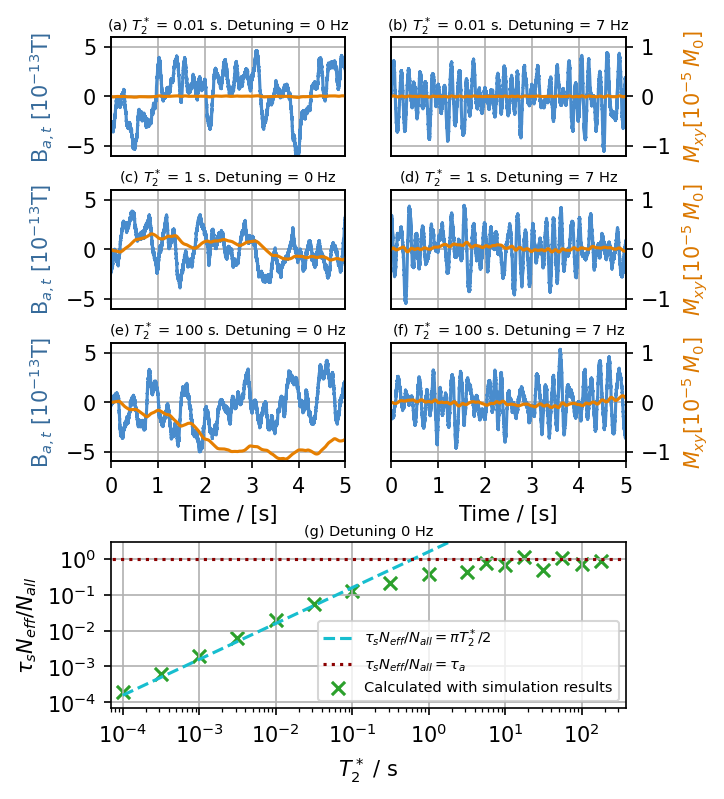

In [114]:
T2star_arr = 10**(np.array([-2., 0, 2]))  # -4., -3.5, -3., -2.5, -2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5
detuning_arr = np.array([0., 7.])

plt.rc('font', size=10)
fig = plt.figure(figsize=(5.8*0.8, 6.5*0.8), dpi=150)  #
gs = gridspec.GridSpec(nrows=5, ncols=2, height_ratios = [1,1,1,0.1,1.4])  # , width_ratios = [1.5, 1.5]
fig.subplots_adjust(top=0.95,
bottom=0.09,
left=0.135,
right=0.875,
hspace=0.32,
wspace=0.195)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

# BALPcolor = [231./256, 127./256, 0./256]
# darkorange [210./256, 142./256, 57./256]
# darker orange [241./256, 132./256, 0./256]
# darker than darker orange [204./256, 112./256, 0./256]
# trjrycolor = 'dodgerblue'  # 'tab:blue' 

trjrycolor  = [231./256, 127./256, 0./256]
trjrylabelcolor = [220./256, 120./256, 0./256]
# darkorange [210./256, 142./256, 57./256]
# darker orange [241./256, 132./256, 0./256]
# darker than darker orange [204./256, 112./256, 0./256]
BALPcolor = [73./256, 141./256, 206./256] # 'tab:blue' slateblue  'cornflowerblue'
BALPlabelcolor = [55./256, 107./256, 156./256]

title_list = [f'(a) $T_2^*$ = 0.01 s. Detuning = {detuning_arr[0]:.0f} Hz', f'(b) $T_2^*$ = 0.01 s. Detuning = {detuning_arr[1]:.0f} Hz',
f'(c) $T_2^*$ = 1 s. Detuning = {detuning_arr[0]:.0f} Hz', f'(d) $T_2^*$ = 1 s. Detuning = {detuning_arr[1]:.0f} Hz',
f'(e) $T_2^*$ = 100 s. Detuning = {detuning_arr[0]:.0f} Hz', f'(f) $T_2^*$ = 100 s. Detuning = {detuning_arr[1]:.0f} Hz']
plotintv = 1
filepath = 'Supplementary/20220818_AxionWindSimulation/20220828Results/'
for i, ax in enumerate([ax0, ax2, ax4]):
    # 1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_timestamp.txt', magnetization.timestamp)
	# 1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_BALP.txt', magnetization.trjry)
	# 1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_trjry.txt', magnetization.BALP_array)
			
    timestamp = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[0]:.2f}_timestamp.txt')
    trjry = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[0]:.2f}_trjry.txt')
    BALP = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[0]:.2f}_BALP.txt')
    # ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr, label='PSD Signal Amp', color='tab:cyan', alpha=1)
    ax.plot(timestamp[0:-1:plotintv], 1e13 * 2 * BALP[0:-1:plotintv, 0], label='', color=BALPcolor, alpha=1)
    # ax.plot(timestamp[0:-1:plotintv], trjry[1:-1:plotintv, 1], label='', color='red', alpha=1)
    ax.set_ylabel('$\\mathrm{B}_{a,t}$ [$10^{-13}$T]', color=BALPlabelcolor)  # \\gamma  / 2
    ax.set_xlim(0, 5)
    ax.set_ylim(-6, 6)
    ax.grid()
    # ax.set_xticks([])
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax_twinx = ax.twinx()
    ax_twinx.plot(timestamp[0:-1:plotintv], 1e5 * trjry[1:-1:plotintv, 1], label='', color=trjrycolor, alpha=1)
    # ax_twinx.set_ylabel('$M_{xy} / M_0$', color = trjrycolor)
    ax_twinx.set_xlim(0, 5)
    ax_twinx.set_ylim(-1.2, 1.2)
    ax_twinx.set_yticks([])


ax4.set_xlabel('Time / [s]')
# ax.set_xticks([0, 2, 4, 6, 8, 10])
ax4.set_xticks([0, 1, 2, 3, 4, 5])
for i, ax in enumerate([ax1, ax3, ax5]):
    timestamp = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[1]:.2f}_timestamp.txt')
    trjry = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[1]:.2f}_trjry.txt')
    BALP = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[1]:.2f}_BALP.txt')
    # ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr, label='PSD Signal Amp', color='tab:cyan', alpha=1)
    ax.plot(timestamp[0:-1:plotintv], 1e13 * 2 * BALP[0:-1:plotintv, 0], label='', color=BALPcolor, alpha=1)  # darkorange
    # ax.plot(timestamp[0:-1:plotintv], trjry[1:-1:plotintv, 1], label='', color='red', alpha=1)
    # ax.set_ylabel('$\\gamma \\mathrm{B}_{a,t}} / 2$', color='darkorange')
    
    ax.set_xlim(0, 5)
    ax.set_ylim(-6, 6)
    ax.grid(True)
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    # ax.set_xticks([])
    # ax.set_yticks([])
    
    # ax.yaxis.set_major_locator(plt.NullLocator())
    # ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax_twinx = ax.twinx()
    ax_twinx.plot(timestamp[0:-1:plotintv], 1e5 * trjry[1:-1:plotintv, 1], label='', color=trjrycolor, alpha=1)
    ax_twinx.set_ylabel('$M_{xy} [10^{-5}\\,M_0]$', color = trjrylabelcolor) # \\times 10^7
    # ax_twinx.set_xlim(1e-13, 1e0)
    # ax_twinx.grid(True)

    ax_twinx.set_ylim(-1.2, 1.2)
    ax_twinx.set_yticks([-1, 0, 1])
    # for tick in ax.xaxis.get_major_ticks():
    #     tick.tick1line.set_visible(False)
    #     tick.tick2line.set_visible(False)
    #     tick.label1.set_visible(False)
    #     tick.label2.set_visible(False)

for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.set_title(title_list[i], fontsize = 7, pad=3)

for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
for i, ax in enumerate([ax1, ax3, ax5]):
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

ax5.set_xlabel('Time / [s]')
ax5.set_xticks([0, 1, 2, 3, 4, 5])

avg_sqrtMxysq_arr_0825 = avg_sqrtMxysq_arr_0825[np.argsort(T2star_arr_0825)]
avg_sqrtBALPsq_arr_0825 = avg_sqrtBALPsq_arr_0825[np.argsort(T2star_arr_0825)]
T2star_arr_0825 = np.sort(T2star_arr_0825)

make_ax6 = True
if make_ax6:
    # ax6 = fig.add_subplot(gs[3,:])
    # axempty = fig.add_subplot(gs[3,:])
    ax6 = fig.add_subplot(gs[4,:])
    ax6.plot(T2star_arr_0825, np.pi / 2 * T2star_arr_0825, label='$\\tau_s N_{eff}/N_{all} = \\pi T_2^*/2$', color='tab:cyan', alpha=1, linestyle='--')
    ax6.hlines(y=taua, xmin = 1e-5, xmax = 3.8e3, colors='darkred', linestyles='dotted', label='$\\tau_s N_{eff}/N_{all} = \\tau_a$')
    ax6.scatter(T2star_arr_0825[:-5], \
        avg_sqrtMxysq_arr_0825[:-5] / (0.5 * TestSample10MHzT.gyroratio * avg_sqrtBALPsq_arr_0825[:-5]), \
        label='Calculated with simulation results', marker='x', s=40, color='tab:green', alpha=1)
    # \\langle \\rangle $\\tau_s  N_{eff}/N_{all}$\n$= \\overline{M_{xy}^2}^{1/2}/ (M_0 \\gamma \\overline{\\mathrm{B}_{a,t}^2}^{1/2}/2)$

    ax6.set_ylabel('$\\tau_s N_{eff}/N_{all}$')  # |Mxy|/($\mathrm{M}_0\gamma\mathrm{B}_a/2$)
    ax6.set_xlabel('$T_2^*$ / s')
    ax6.set_title('(g) Detuning 0 Hz', fontsize = 7, pad=3)
    ax6.set_xscale('log')
    ax6.set_yscale('log')
    ax6.set_xlim(0.7e-4, 3.8e2)
    ax6.set_ylim(0.7e-4, 3e0)
    ax6.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
    ax6.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
    ax6.grid()
    ax6.legend(loc='best', fontsize = 7)  # bbox_to_anchor=(1.0, 1.0), loc='upper left', frameon=False
    # plt.tight_layout()
plt.show()

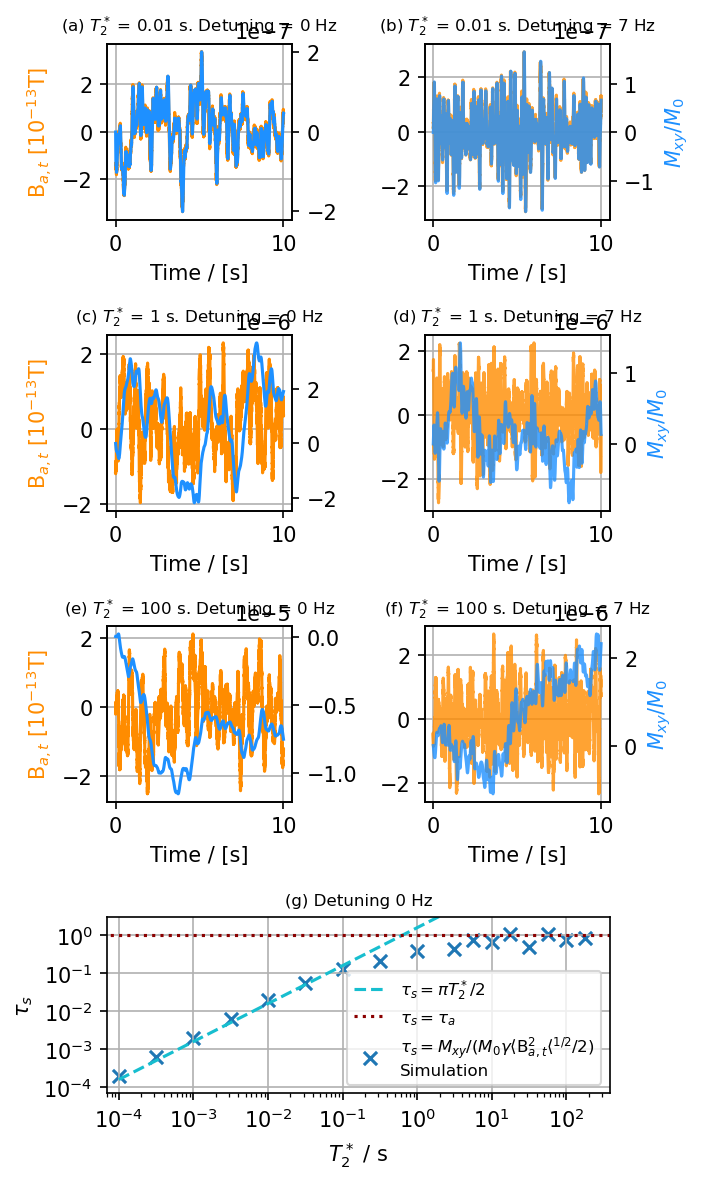

In [94]:
T2star_arr = 10**(np.array([-2., 0, 2]))  # -4., -3.5, -3., -2.5, -2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5
detuning_arr = np.array([0., 7.])

plt.rc('font', size=10)
fig = plt.figure(figsize=(6*0.8, 10*0.8), dpi=150)  #
gs = gridspec.GridSpec(nrows=4, ncols=2)  #
# fig.subplots_adjust(left=0.05, right=0.95, top=0.95,
#                     bottom=0.05, wspace=0.05, hspace=0.05)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,:])

title_list = [f'(a) $T_2^*$ = 0.01 s. Detuning = {detuning_arr[0]:.0f} Hz', f'(b) $T_2^*$ = 0.01 s. Detuning = {detuning_arr[1]:.0f} Hz',
f'(c) $T_2^*$ = 1 s. Detuning = {detuning_arr[0]:.0f} Hz', f'(d) $T_2^*$ = 1 s. Detuning = {detuning_arr[1]:.0f} Hz',
f'(e) $T_2^*$ = 100 s. Detuning = {detuning_arr[0]:.0f} Hz', f'(f) $T_2^*$ = 100 s. Detuning = {detuning_arr[1]:.0f} Hz']
plotintv = 1
filepath = 'Supplementary/20220818_AxionWindSimulation/20220828Results/'
for i, ax in enumerate([ax0, ax2, ax4]):
    # 1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_timestamp.txt', magnetization.timestamp)
	# 1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_BALP.txt', magnetization.trjry)
	# 1MHz_T2star_{T2star:.2e}_detuning_{detuning:.2f}_trjry.txt', magnetization.BALP_array)
			
    timestamp = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[0]:.2f}_timestamp.txt')
    trjry = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[0]:.2f}_trjry.txt')
    BALP = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[0]:.2f}_BALP.txt')
    # ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr, label='PSD Signal Amp', color='tab:cyan', alpha=1)
    ax.plot(timestamp[0:-1:plotintv], 1e13 * BALP[0:-1:plotintv, 0], label='', color='darkorange', alpha=1)
    # ax.plot(timestamp[0:-1:plotintv], trjry[1:-1:plotintv, 1], label='', color='red', alpha=1)
    ax.set_xlabel('Time / [s]')
    ax.set_ylabel('$\\mathrm{B}_{a,t}$ [$10^{-13}$T]', color='darkorange')  # \\gamma  / 2
    # ax.set_xlim(0, 5)
    # ax.set_ylim(-3, 3)
    ax.grid()
    # ax.set_xticks([])
    # ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax_twinx = ax.twinx()
    ax_twinx.plot(timestamp[0:-1:plotintv], trjry[1:-1:plotintv, 1], label='', color='dodgerblue', alpha=1)
    # ax_twinx.set_ylabel('$M_{xy} / M_0$', color = 'dodgerblue')
    # ax_twinx.set_xlim(0, 5)
    # ax_twinx.set_ylim(-2e-5, 2e-5)
    # ax_twinx.set_yticks([])



# ax4.set_xlabel('Time / [s]')
# ax.set_xticks([0, 2, 4, 6, 8, 10])
# ax4.set_xticks([0, 1, 2, 3, 4, 5])
for i, ax in enumerate([ax1, ax3, ax5]):
    timestamp = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[1]:.2f}_timestamp.txt')
    trjry = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[1]:.2f}_trjry.txt')
    BALP = np.loadtxt(filepath + f'1MHz_T2star_{T2star_arr[i]:.2e}_detuning_{detuning_arr[1]:.2f}_BALP.txt')
    # ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr, label='PSD Signal Amp', color='tab:cyan', alpha=1)
    ax.plot(timestamp[0:-1:plotintv], 1e13 * BALP[0:-1:plotintv, 0], label='', color='darkorange', alpha=0.8)
    # ax.plot(timestamp[0:-1:plotintv], trjry[1:-1:plotintv, 1], label='', color='red', alpha=1)
    # ax.set_ylabel('$\\gamma \\mathrm{B}_{a,t}} / 2$', color='darkorange')
    ax.set_xlabel('Time / [s]')
    # ax.set_xlim(0, 5)
    # ax.set_ylim(-3, 3)
    ax.grid()
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.yaxis.set_major_locator(plt.NullLocator())
    # ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax_twinx = ax.twinx()
    ax_twinx.plot(timestamp[0:-1:plotintv], trjry[1:-1:plotintv, 1], label='', color='dodgerblue', alpha=0.8)
    ax_twinx.set_ylabel('$M_{xy} / M_0$', color = 'dodgerblue')
    # ax_twinx.set_xlim(1e-13, 1e0)
    # ax_twinx.set_ylim(1e-13, 1e0)
    # ax_twinx.set_yticks([])

for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.set_title(title_list[i], fontsize = 8)

# for i, ax in enumerate([ax0, ax1, ax2, ax3]):
#     for tick in ax.xaxis.get_major_ticks():
#         tick.tick1line.set_visible(False)
#         tick.tick2line.set_visible(False)
#         tick.label1.set_visible(False)
#         tick.label2.set_visible(False)


# ax5.set_xlabel('Time / [s]')
# ax.set_xticks([0, 1, 2, 3, 8, 10])

avg_sqrtMxysq_arr_0825 = avg_sqrtMxysq_arr_0825[np.argsort(T2star_arr_0825)]
avg_sqrtBALPsq_arr_0825 = avg_sqrtBALPsq_arr_0825[np.argsort(T2star_arr_0825)]
T2star_arr_0825 = np.sort(T2star_arr_0825)

ax6.plot(T2star_arr_0825, np.pi * T2star_arr_0825 / 2, label='$\\tau_s = \\pi T_2^*/2$', color='tab:cyan', alpha=1, linestyle='--')
ax6.hlines(y=taua, xmin = 1e-5, xmax = 3.8e3, colors='darkred', linestyles='dotted', label='$\\tau_s = \\tau_a$')

# ax6.vlines(x=taua / np.pi, ymin = 1e-5, ymax = 1e3, colors='tab:red', linestyles='dotted', label='$\\pi T_2^* = \\tau_a$')
# ax6.vlines(x=taua, ymin = 1e-5, ymax = 1e3, colors='grey', linestyles='dotted', label='$T_2^* = \\tau_a$')
ax6.scatter(T2star_arr_0825[:-5], avg_sqrtMxysq_arr_0825[:-5] / (0.5 * TestSample10MHzT.gyroratio * avg_sqrtBALPsq_arr_0825[:-5]), \
label='$\\tau_s = M_{xy} / (M_0 \\gamma \\langle\\mathrm{B}_{a,t}^2 \\langle^{1/2}/2)$\nSimulation', marker='x', s=40, color='tab:blue', alpha=1)
ax6.set_ylabel('$\\tau_s$')  # |Mxy|/($\mathrm{M}_0\gamma\mathrm{B}_a/2$)
ax6.set_xlabel('$T_2^*$ / s')
ax6.set_title('(g) Detuning 0 Hz', fontsize = 8)
ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.set_xlim(0.7e-4, 3.8e2)
ax6.set_ylim(0.7e-4, 3e0)
ax6.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
ax6.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
ax6.grid()
ax6.legend(loc='best', fontsize = 8)  # bbox_to_anchor=(1.0, 1.0), loc='upper left'
plt.tight_layout()
plt.show()

In [8]:
check(timestamp)
check(trjry)
check(BALP)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_23756/2015163062.py @1 timestamp : ndarray(array([0.00000000e+00, 1.49333330e-04, 2.98666660e-04, ...,
       9.99950913e+00, 9.99965846e+00, 9.99980779e+00])) [shape=(66964,)]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_23756/2015163062.py @2 trjry : ndarray(array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.86785687e-34, -1.28682090e-09,  1.00000000e+00],
       [-1.25458524e-17, -2.52340867e-09,  1.00000000e+00],
       ...,
       [ 3.06505506e-11,  4.58535279e-08,  1.00000000e+00],
       [ 3.06572987e-11,  4.58630027e-08,  1.00000000e+00],
       [ 3.06547997e-11,  4.58586553e-08,  1.00000000e+00]])) [shape=(66965, 3)]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_23756/2015163062.py @3 BALP : ndarray(array([[-1.38238835e-13, -0.00000000e+00, -3.06951874e-29],
       [-1.34892472e-13,  1.34776926e-21, -2.24641092e-29],
       [-1.35200696e-13,  2.70169771e-21, -2.25154388e-29],
       ...,
       [ 7.35684256e-14, -4.9

C:\Users\zhenf\AppData\Local\Temp/ipykernel_2636/461727017.py @15 magnetization.timestamp.shape : tuple((33482,)) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_2636/461727017.py @16 magnetization.trjry[0:-1:saveintv, 0].shape : tuple((33482,)) [len=1]


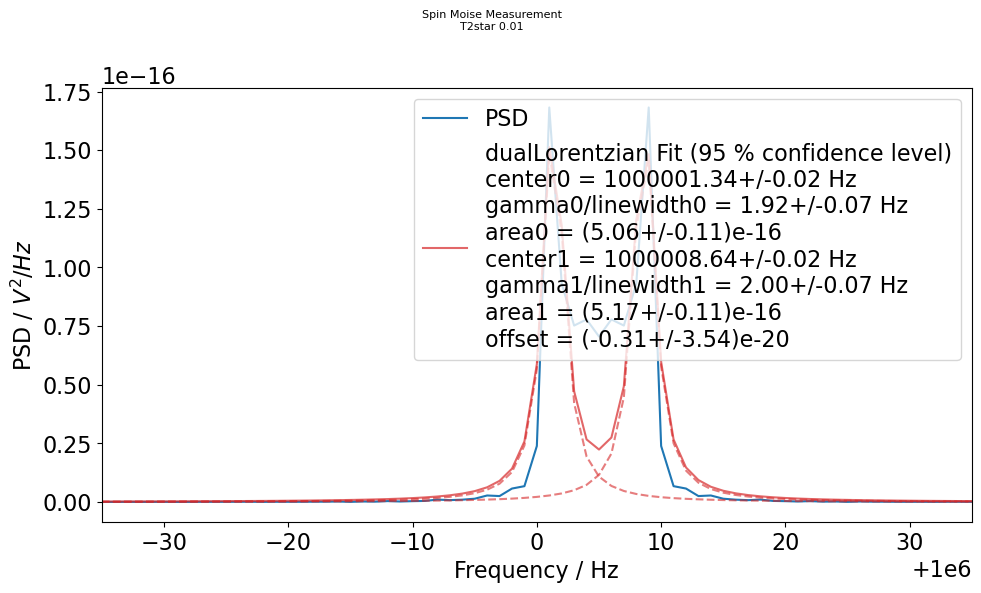

linewidth = 31.831 Hz, np.amax(spectrum) = 1.68e-16
T2star = 0.01 , avg Mt sq = 4.00e-15


In [19]:
liastream = LIASignal(
	name='LIA data',
	device='LIA',
	device_id='dev4434',
	file=f'T2star {T2star:g}',
	verbose=True
	)
liastream.attenuation = 0
liastream.filterstatus = 'off'
liastream.LIAfilter_TC=0.0
liastream.LIAfilter_order = 0
liastream.dmodfreq = magnetization.B0z * TestSample.gyroratio / (2 * np.pi)
saveintv = 1
liastream.samprate = magnetization.simurate / saveintv
check(magnetization.timestamp.shape)
check(magnetization.trjry[0:-1:saveintv, 0].shape)

liastream.dataX = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 0] #* \
	#np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
liastream.dataY = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 1] #* \
	#np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

# liastream.dataX = 0.5 * 1 * \
# 	np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
# liastream.dataY = 0.5 * 1 * \
# 	np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

liastream.GetSpinNoisePSD(
	chunksize=1,  # magnetization.T2
	analysisrange = [0, -1],  # [0, int(9*samplelinewidth*liastream.samprate)]
	interestingfreq_list=[],
	# ploycorrparas=ployparas,
	ploycorrparas=[],
	showstd=False,
	# stddev_range=[1.349150e6,1.349750e6],
	verbose=False)
liastream.FitPSD(
		fitfunction = 'dualLorentzian',  # 'Lorentzian' 'dualLorentzian' 'tribLorentzian' 'Gaussian 'dualGaussian' 'auto' 'Polyeven' 
		inputfitparas = ['auto','auto','auto','auto'],
		smooth=False,
		smoothlevel=1,
		fitrange=['auto','auto'],
		alpha=0.05, 
		
		getresidual=False, 
		getchisq=False, 
		verbose=False    
	)
specxaxis, spectrum, specxunit, specyunit = liastream.GetSpectrum(
	showtimedomain=False,
	showacqdata=True,
	showfreqdomain=True,
	showfit=True,
	showresidual=False,
	showlegend=True,  # !!!!!show or not to show legend
	spectype='PSD',  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
	ampunit='V',
	Mf=sqdsensor.Mf,
	Rf=sqdsensor.Rf,
	specxunit='Hz',  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
	specxlim = [axionwind.nu - 35, axionwind.nu + 35],
	# specylim=[0, 4e-23],
	# specxunit2 = 'ppm', 
	# referfreq=liastream.dmodfreq,
	# specx2format = '{:.0f}',
	
	specyscale='linear',  # 'log', 'linear'
	showstd=False,
	
	figsize=(10,6),

	top=0.85,
	bottom=0.03,
	left=0.11,
	right=0.98,
	hspace=0.73,
	wspace=0.2,

	showplt_opt=True,
	return_opt=True,
	verbose=False
	)
print(f'linewidth = {1.0 / (np.pi * T2star):g} Hz, np.amax(spectrum) = {np.amax(spectrum):.2e}')
listofGammaandSAmp.append([T2star, np.amax(spectrum)])
listofT2andavgMtsq.append([magnetization.T2, magnetization.avgMxsq + magnetization.avgMysq])  # , np.sum(spectrum), np.amax(spectrum)
print(f'T2star = {T2star:g} , avg Mt sq = {magnetization.avgMxsq + magnetization.avgMysq:.2e}')

# listofspectrum.append(spectrum)
# K:\CASPEr data\20220522_NMRKineticSimu_data_test2
# f'\\\\Desktop-3ge6tor/d/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220522_test0/sample_IDEN/'

C:\Users\zhenf\AppData\Local\Temp/ipykernel_2636/461727017.py @15 magnetization.timestamp.shape : tuple((33482,)) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_2636/461727017.py @16 magnetization.trjry[0:-1:saveintv, 0].shape : tuple((33482,)) [len=1]


c:\Users\zhenf\anaconda3\envs\CASPEr-venv_20220214\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


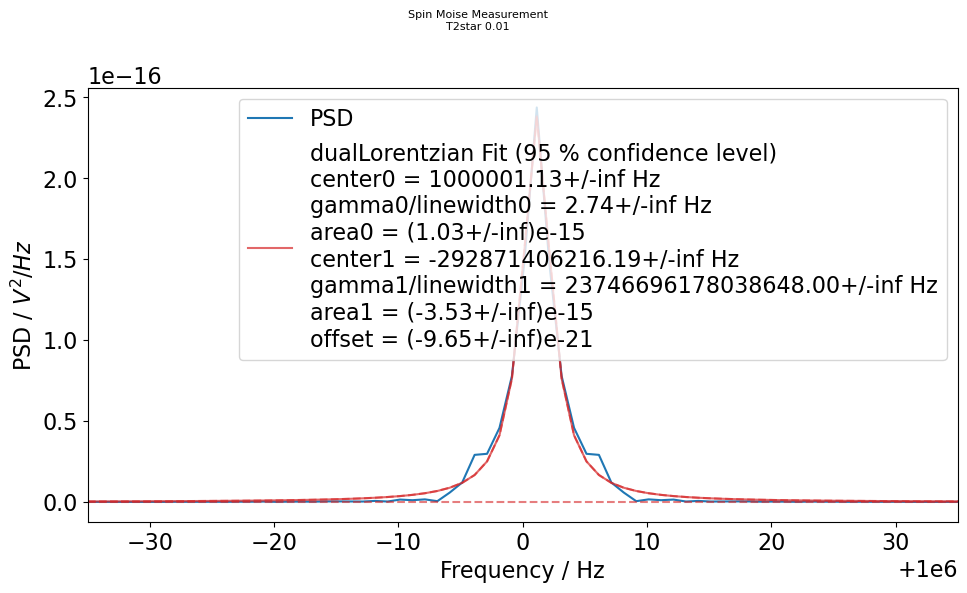

linewidth = 31.831 Hz, np.amax(spectrum) = 2.44e-16
T2star = 0.01 , avg Mt sq = 3.85e-15


In [32]:
liastream = LIASignal(
	name='LIA data',
	device='LIA',
	device_id='dev4434',
	file=f'T2star {T2star:g}',
	verbose=True
	)
liastream.attenuation = 0
liastream.filterstatus = 'off'
liastream.LIAfilter_TC=0.0
liastream.LIAfilter_order = 0
liastream.dmodfreq = magnetization.B0z * TestSample.gyroratio / (2 * np.pi)
saveintv = 1
liastream.samprate = magnetization.simurate / saveintv
check(magnetization.timestamp.shape)
check(magnetization.trjry[0:-1:saveintv, 0].shape)

liastream.dataX = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 0] #* \
	#np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
liastream.dataY = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 1] #* \
	#np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

# liastream.dataX = 0.5 * 1 * \
# 	np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
# liastream.dataY = 0.5 * 1 * \
# 	np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

liastream.GetSpinNoisePSD(
	chunksize=1,  # magnetization.T2
	analysisrange = [0, -1],  # [0, int(9*samplelinewidth*liastream.samprate)]
	interestingfreq_list=[],
	# ploycorrparas=ployparas,
	ploycorrparas=[],
	showstd=False,
	# stddev_range=[1.349150e6,1.349750e6],
	verbose=False)
liastream.FitPSD(
		fitfunction = 'dualLorentzian',  # 'Lorentzian' 'dualLorentzian' 'tribLorentzian' 'Gaussian 'dualGaussian' 'auto' 'Polyeven' 
		inputfitparas = ['auto','auto','auto','auto'],
		smooth=False,
		smoothlevel=1,
		fitrange=['auto','auto'],
		alpha=0.05, 
		
		getresidual=False, 
		getchisq=False, 
		verbose=False    
	)
specxaxis, spectrum, specxunit, specyunit = liastream.GetSpectrum(
	showtimedomain=False,
	showacqdata=True,
	showfreqdomain=True,
	showfit=True,
	showresidual=False,
	showlegend=True,  # !!!!!show or not to show legend
	spectype='PSD',  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
	ampunit='V',
	Mf=sqdsensor.Mf,
	Rf=sqdsensor.Rf,
	specxunit='Hz',  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
	specxlim = [axionwind.nu - 35, axionwind.nu + 35],
	# specylim=[0, 4e-23],
	# specxunit2 = 'ppm', 
	# referfreq=liastream.dmodfreq,
	# specx2format = '{:.0f}',
	
	specyscale='linear',  # 'log', 'linear'
	showstd=False,
	
	figsize=(10,6),

	top=0.85,
	bottom=0.03,
	left=0.11,
	right=0.98,
	hspace=0.73,
	wspace=0.2,

	showplt_opt=True,
	return_opt=True,
	verbose=False
	)
print(f'linewidth = {1.0 / (np.pi * T2star):g} Hz, np.amax(spectrum) = {np.amax(spectrum):.2e}')
listofGammaandSAmp.append([T2star, np.amax(spectrum)])
listofT2andavgMtsq.append([magnetization.T2, magnetization.avgMxsq + magnetization.avgMysq])  # , np.sum(spectrum), np.amax(spectrum)
print(f'T2star = {T2star:g} , avg Mt sq = {magnetization.avgMxsq + magnetization.avgMysq:.2e}')

# listofspectrum.append(spectrum)
# K:\CASPEr data\20220522_NMRKineticSimu_data_test2
# f'\\\\Desktop-3ge6tor/d/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220522_test0/sample_IDEN/'

C:\Users\zhenf\AppData\Local\Temp/ipykernel_2636/2097083940.py @15 magnetization.timestamp.shape : tuple((33482,)) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_2636/2097083940.py @16 magnetization.trjry[0:-1:saveintv, 0].shape : tuple((33482,)) [len=1]


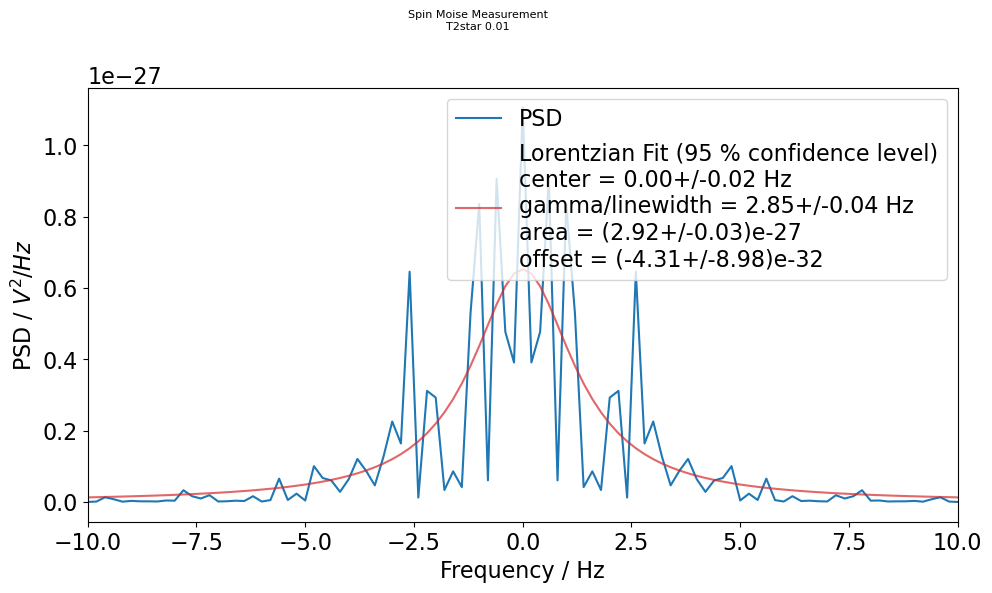

linewidth = 31.831 Hz, np.amax(spectrum) = 1.11e-27
T2star = 0.01 , avg Mt sq = 4.05e-15


In [26]:
liastream = LIASignal(
	name='LIA data',
	device='LIA',
	device_id='dev4434',
	file=f'T2star {T2star:g}',
	verbose=True
	)
liastream.attenuation = 0
liastream.filterstatus = 'off'
liastream.LIAfilter_TC=0.0
liastream.LIAfilter_order = 0
liastream.dmodfreq = 0
saveintv = 1
liastream.samprate = magnetization.simurate / saveintv
check(magnetization.timestamp.shape)
check(magnetization.trjry[0:-1:saveintv, 0].shape)

liastream.dataX = 0.5 * magnetization.BALP_array[int(0*magnetization.simurate):-1:saveintv, 0] #* \
	#np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
liastream.dataY = 0.5 * magnetization.BALP_array[int(0*magnetization.simurate):-1:saveintv, 1] #* \
	#np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

# liastream.dataX = 0.5 * 1 * \
# 	np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
# liastream.dataY = 0.5 * 1 * \
# 	np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

liastream.GetSpinNoisePSD(
	chunksize=5,  # magnetization.T2
	analysisrange = [0, -1],  # [0, int(9*samplelinewidth*liastream.samprate)]
	interestingfreq_list=[],
	# ploycorrparas=ployparas,
	ploycorrparas=[],
	showstd=False,
	# stddev_range=[1.349150e6,1.349750e6],
	verbose=False)
liastream.FitPSD(
		fitfunction = 'Lorentzian',  # 'Lorentzian' 'dualLorentzian' 'tribLorentzian' 'Gaussian 'dualGaussian' 'auto' 'Polyeven' 
		inputfitparas = ['auto','auto','auto','auto'],
		smooth=False,
		smoothlevel=1,
		fitrange=['auto','auto'],
		alpha=0.05, 
		
		getresidual=False, 
		getchisq=False, 
		verbose=False    
	)
specxaxis, spectrum, specxunit, specyunit = liastream.GetSpectrum(
	showtimedomain=False,
	showacqdata=True,
	showfreqdomain=True,
	showfit=True,
	showresidual=False,
	showlegend=True,  # !!!!!show or not to show legend
	spectype='PSD',  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
	ampunit='V',
	Mf=sqdsensor.Mf,
	Rf=sqdsensor.Rf,
	specxunit='Hz',  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
	specxlim = [ - 10, + 10],
	# specylim=[0, 4e-23],
	# specxunit2 = 'ppm', 
	# referfreq=liastream.dmodfreq,
	# specx2format = '{:.0f}',
	
	specyscale='linear',  # 'log', 'linear'
	showstd=False,
	
	figsize=(10,6),

	top=0.85,
	bottom=0.03,
	left=0.11,
	right=0.98,
	hspace=0.73,
	wspace=0.2,

	showplt_opt=True,
	return_opt=True,
	verbose=False
	)
print(f'linewidth = {1.0 / (np.pi * T2star):g} Hz, np.amax(spectrum) = {np.amax(spectrum):.2e}')
listofGammaandSAmp.append([T2star, np.amax(spectrum)])
listofT2andavgMtsq.append([magnetization.T2, magnetization.avgMxsq + magnetization.avgMysq])  # , np.sum(spectrum), np.amax(spectrum)
print(f'T2star = {T2star:g} , avg Mt sq = {magnetization.avgMxsq + magnetization.avgMysq:.2e}')

# listofspectrum.append(spectrum)
# K:\CASPEr data\20220522_NMRKineticSimu_data_test2
# f'\\\\Desktop-3ge6tor/d/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220522_test0/sample_IDEN/'

In [81]:
check(T2star_arr)
# check(avg_absMxy_list)
check(avg_sqrtMxysq_list)
# check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)


C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2006777022.py @1 T2star_arr : ndarray([  5.62341325  17.7827941   56.23413252 177.827941  ]) [shape=(4,)]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2006777022.py @3 avg_sqrtMxysq_list : list([1.8936683372404932e-06, 3.446406711243213e-06, 2.9824055357928308e-06, 2.493152043067911e-06]) [len=4]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2006777022.py @5 avg_sqrtBALPsq_list : list([8.012830385160042e-14, 1.0060984404189555e-13, 8.951541498537557e-14, 9.335857934389245e-14]) [len=4]


In [36]:
 # detuning + 1 Hz
check(T2star)
check(avg_sqrtMxysq_list)
check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @1 T2star : float64(316.22776601683796) [shape=()]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @2 avg_sqrtMxysq_list : list([1.0291657069639695e-05]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @3 avg_absBALP_list : list([7.345879605206319e-14]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @4 avg_sqrtBALPsq_list : list([9.271410990648845e-14]) [len=1]


In [40]:
check(T2star) # no detuning
check(avg_sqrtMxysq_list)
check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @1 T2star : float64(316.22776601683796) [shape=()]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @2 avg_sqrtMxysq_list : list([2.5588884454254495e-06]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @3 avg_absBALP_list : list([7.95145735888222e-14]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @4 avg_sqrtBALPsq_list : list([1.0069474377420715e-13]) [len=1]


In [54]:
 # detuning + 1 Hz
check(T2star_arr)
check(avg_sqrtMxysq_list)
check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @2 T2star_arr : ndarray([ 1000.          3162.27766017 10000.         10000.        ]) [shape=(4,)]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @3 avg_sqrtMxysq_list : list([9.103859068716038e-06, 3.489572228807298e-06, 4.389712567315872e-06, 4.036901298601079e-06]) [len=4]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @4 avg_absBALP_list : list([7.211204570272294e-14, 7.987491660576869e-14, 7.01579361067662e-14, 6.975328896647811e-14]) [len=4]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @5 avg_sqrtBALPsq_list : list([8.828572572597242e-14, 1.0037410089447239e-13, 8.901933921516225e-14, 8.764071564599288e-14]) [len=4]


C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2808942185.py @32 magnetization.ALPwind.BALP : float(1.591549430918953e-13) 


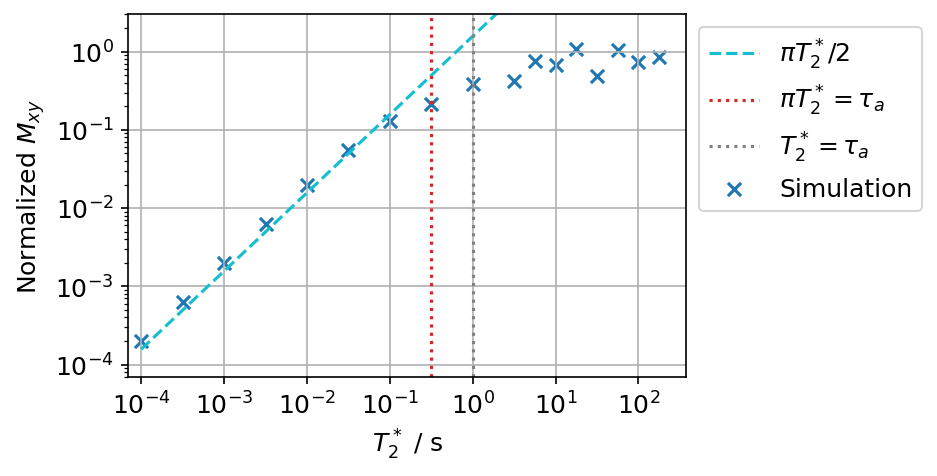

In [93]:
# data from 2022-08-25
T2star_arr = np.array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01, 1.000000e+02, 199.52623149688787, 316.22776601683796,
       1000., 3162.27766017, 10000.,5.62341325 , 17.7827941,   56.23413252, 177.827941 ])

avg_sqrtMxysq_arr = np.array([6.00729525403692e-10, 1.892680563138194e-09, 6.320670227486919e-09, 
1.7849948295486614e-08, 5.722704219768959e-08, 1.831828483075051e-07,
 4.02276477825698e-07, 6.488768660724763e-07, 1.1414089977788986e-06, 1.2433839539645424e-06, 
 2.2376262525500237e-06, 1.4880993433176427e-06, 2.2333038491821554e-06, 4.196305375588696e-06, 1.0291657069639695e-05,
 9.103859068716038e-06, 3.489572228807298e-06, 4.389712567315872e-06,
 1.8936683372404932e-06, 3.446406711243213e-06, 2.9824055357928308e-06, 2.493152043067911e-06])

# avg_absBALP_arr = np.array([9.563204636468877e-14, 9.528052775590814e-14, 1.0070631992363127e-13, 
# 9.019590747340721e-14, 9.35195829409311e-14, 1.0462683527124416e-13, 
# 9.894666698325927e-14, 9.779880509450935e-14, 9.514599957803521e-14, 9.376164395791295e-14, 
# 1.0510331838693979e-13, 9.614715461955493e-14])

avg_sqrtBALPsq_arr = np.array([9.563204636468877e-14, 9.528052775590814e-14, 1.0070631992363127e-13, 
9.019590747340721e-14, 9.35195829409311e-14, 1.0462683527124416e-13, 
9.894666698325927e-14, 9.779880509450935e-14, 9.514599957803521e-14, 9.376164395791295e-14, 
1.0510331838693979e-13, 9.614715461955493e-14, 9.704109486569754e-14, 9.271410990648845e-14, 9.349755671661435e-14,
8.828572572597242e-14, 1.0037410089447239e-13, 8.901933921516225e-14,
8.012830385160042e-14, 1.0060984404189555e-13, 8.951541498537557e-14, 9.335857934389245e-14])
# avg_sqrtMxysq_arr = np.array(avg_sqrtMxysq_list)
# avg_absBALP_arr = np.array(avg_absBALP_list)
# avg_sqrtBALPsq_arr = np.array(avg_sqrtBALPsq_list)

avg_sqrtMxysq_arr = avg_sqrtMxysq_arr[np.argsort(T2star_arr)]
avg_sqrtBALPsq_arr = avg_sqrtBALPsq_arr[np.argsort(T2star_arr)]
T2star_arr = np.sort(T2star_arr)
check(magnetization.ALPwind.BALP)

taua = 1.0
plt.rc('font', size=12)
fig = plt.figure(figsize=(6*0.8, 4*0.8), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=1)  #
# fig.subplots_adjust(left=left_spc, top=top_spc, right=right_spc,
#                     bottom=bottom_spc, wspace=xgrid_spc, hspace=ygrid_spc)
ax = fig.add_subplot(gs[0,0])

# ax.plot(T2star_arr, T2star_arr * 1 / (T2star_arr + 1), label='$\dfrac{T_2^*\\tau_a}{T_2^* + \\tau_a}$', color='tab:brown', alpha=1, linestyle='--')
ax.plot(T2star_arr, np.pi * T2star_arr / 2, label='$\\pi T_2^*/2$', color='tab:cyan', alpha=1, linestyle='--')
# ax.plot(T2star_arr, (1 - np.exp(- (np.pi*T2star_arr / taua)**1)) * 0.5 * taua, label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_a/2$', 
# color='tab:green', alpha=1, linestyle='--')
# ax.plot(T2star_arr, (1 - np.exp(- np.pi*T2star_arr / taua)) * taua, label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_a$', 
# color='tab:green', alpha=1, linestyle='--')

# ax.plot(T2star_arr, (1 - np.exp(- np.pi*T2star_arr / taua)) /((1 - np.exp(- T2star_arr / taua))/T2star_arr + 1/taua), \
#     label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_s$', color='tab:purple', alpha=1, linestyle='--')
# ax.plot(T2star_arr, Mt_arr, label='Stochastic axion simulation', color='tab:blue', alpha=1)
ax.vlines(x=taua / np.pi, ymin = 1e-5, ymax = 1e3, colors='tab:red', linestyles='dotted', label='$\\pi T_2^* = \\tau_a$')
ax.vlines(x=taua, ymin = 1e-5, ymax = 1e3, colors='grey', linestyles='dotted', label='$T_2^* = \\tau_a$')
ax.scatter(T2star_arr[:-5], avg_sqrtMxysq_arr[:-5] / (0.5 * TestSample.gyroratio * avg_sqrtBALPsq_arr[:-5]), label='Simulation', marker='x', s=40, color='tab:blue', alpha=1)

# ax.scatter(T2star_arr, avg_sqrtMxysq_arr / (0.5 * TestSample.gyroratio * avg_absBALP_arr), label='Stochastic axion simulation 2', marker='x', s=40, color='tab:orange', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('Normalized $M_{xy}$')  # |Mxy|/($\mathrm{M}_0\gamma\mathrm{B}_a/2$)
ax.set_xlabel('$T_2^*$ / s')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.7e-4, 3.8e2)
ax.set_ylim(0.7e-4, 3e0)
ax.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
# ax.set_xlim(0, 4e-3)
# ax.set_ylim(-0.7e-2, 3e-2)

ax.grid()
# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.suptitle('')
# plt.tight_layout()
plt.show()
